In [1]:
!mkdir -p ~/aiffel/data_analysis_basic/data
!ln -s ~/data/* ~/aiffel/data_analysis_basic/data

ln: failed to create symbolic link '/aiffel/aiffel/data_analysis_basic/data/customer_for_cluster.csv': File exists


In [3]:
#pandas , numjpym , matplkot
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('default')
import seaborn as sns

#customer 변수 
customer_data = pd.read_csv('~/aiffel/data_analysis_basic/data/customer_for_cluster.csv')

customer_data.head()


,Install,Time_stamp,Status,ID,Payment,Game_Name,Level_score,Time_score,PK,BOSS,Gacha,Attack,Mining
0,2022-05-12,2022-05-27,purchase,Jaime_521,4900,Mine Ground,83.156420,71.314875,48.576665,57.254297,14.831634,88.947130,72.991489
1,2022-01-29,2022-02-08,purchase,Jasmine_839,9900,Mine Ground,85.171839,73.128354,78.095900,74.245402,31.625817,33.573938,77.701619
2,2022-01-14,2022-01-23,purchase,Rebecca_530,4900,Mine Ground,82.928130,70.780184,46.003125,69.213774,37.878962,76.024761,61.387637
3,2022-02-19,2022-03-08,purchase,Kimberly_648,9900,Mine Ground,83.700084,77.175798,36.722313,67.653544,26.107783,86.274249,65.007521
4,2022-04-02,2022-04-11,purchase,Edward_512,19900,Mine Ground,86.330819,76.646228,63.983821,74.986060,47.469284,35.454266,72.015434


In [4]:
customer_data.info()
#18506,12행 pk(player kill) mining 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Install      18506 non-null  object 
 1   Time_stamp   18506 non-null  object 
 2   Status       18506 non-null  object 
 3   ID           18506 non-null  object 
 4   Payment      18506 non-null  int64  
 5   Game_Name    18506 non-null  object 
 6   Level_score  18506 non-null  float64
 7   Time_score   18506 non-null  float64
 8   PK           18506 non-null  float64
 9   BOSS         18506 non-null  float64
 10  Gacha        18506 non-null  float64
 11  Attack       18506 non-null  float64
 12  Mining       18506 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


In [6]:
#군집분석(Cluster Analysis) 이 사용됩니다.VIP고객을 분류 radAR 분석 안함
from sklearn.cluster import KMeans
from sklearn import preprocessing

temp_var = customer_data[['Level_score','Time_score']]
temp_var

,Level_score,Time_score
0,83.156420,71.314875
1,85.171839,73.128354
2,82.928130,70.780184
3,83.700084,77.175798
4,86.330819,76.646228
...,...,...
18501,28.755368,63.765649
18502,27.767066,58.762254
18503,30.275532,37.941294
18504,28.758063,65.117374


In [8]:
#StandardScaler()함수는 할당받은 값의 스케일을 조정, fit()함수는 데이터셋의 평균과 표준편차를 계산
#ransform()함수는 데이터셋의 평균과 표준편차를 각각 0과 1
temp_var = preprocessing.StandardScaler().fit(temp_var).transform(temp_var)

In [10]:
#궁집분서 
Kmeans = KMeans(n_clusters=5, # 5개 고정
                init='k-means++',
                n_init=10,
                verbose=True,
                max_iter=100,
                random_state=1111
               )

Kmeans.fit(temp_var)

Initialization complete
Iteration 0, inertia 2497.8632079961108
Iteration 1, inertia 2200.883438081366
Iteration 2, inertia 2092.338616177069
Iteration 3, inertia 2007.5957692174911
Iteration 4, inertia 1945.6131933510846
Iteration 5, inertia 1906.2578810272917
Iteration 6, inertia 1885.3067588011133
Iteration 7, inertia 1873.7510076411158
Iteration 8, inertia 1866.9684670908505
Iteration 9, inertia 1863.0984968737648
Iteration 10, inertia 1861.1510878670192
Iteration 11, inertia 1860.2433556391384
Converged at iteration 11: center shift 4.568322224962504e-05 within tolerance 0.00010000000000000034.
Initialization complete
Iteration 0, inertia 2652.9598170024774
Iteration 1, inertia 1997.143046755115
Iteration 2, inertia 1915.4711878357073
Iteration 3, inertia 1886.96431328181
Iteration 4, inertia 1873.6864541358068
Iteration 5, inertia 1866.7431300342519
Iteration 6, inertia 1862.9879945727562
Iteration 7, inertia 1861.1011652223392
Iteration 8, inertia 1860.2255695759477
Converged at

KMeans(max_iter=100, n_clusters=5, random_state=1111, verbose=True)

In [11]:
#customer data 에 clumns추가 
cluster_label = Kmeans.labels_

customer_data['Cluster'] = pd.DataFrame(cluster_label)
customer_data

,Install,Time_stamp,Status,ID,Payment,Game_Name,Level_score,Time_score,PK,BOSS,Gacha,Attack,Mining,Cluster
0,2022-05-12,2022-05-27,purchase,Jaime_521,4900,Mine Ground,83.156420,71.314875,48.576665,57.254297,14.831634,88.947130,72.991489,1
1,2022-01-29,2022-02-08,purchase,Jasmine_839,9900,Mine Ground,85.171839,73.128354,78.095900,74.245402,31.625817,33.573938,77.701619,1
2,2022-01-14,2022-01-23,purchase,Rebecca_530,4900,Mine Ground,82.928130,70.780184,46.003125,69.213774,37.878962,76.024761,61.387637,1
3,2022-02-19,2022-03-08,purchase,Kimberly_648,9900,Mine Ground,83.700084,77.175798,36.722313,67.653544,26.107783,86.274249,65.007521,1
4,2022-04-02,2022-04-11,purchase,Edward_512,19900,Mine Ground,86.330819,76.646228,63.983821,74.986060,47.469284,35.454266,72.015434,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18501,2022-05-09,2022-05-10,play,Danielle_910,0,Mine Ground,28.755368,63.765649,30.427502,58.852150,56.549457,24.272387,46.070132,3
18502,2022-04-04,2022-04-23,play,Marilyn_968,0,Mine Ground,27.767066,58.762254,54.093863,69.246963,65.541975,41.359648,36.397338,3
18503,2022-01-15,2022-01-16,play,Monique_818,0,Mine Ground,30.275532,37.941294,12.596498,46.007774,64.563203,31.749220,37.573881,2
18504,2022-01-29,2022-02-03,play,Mark_684,0,Mine Ground,28.758063,65.117374,51.919927,63.716950,58.105054,40.035940,41.720459,3


In [12]:
#분배 확인 
customer_data['Cluster'].value_counts()


0    3915
1    3701
2    3698
4    3687
3    3505
Name: Cluster, dtype: int64

In [13]:
# RFM_data의 Class를 기준으로 Recency, Frequency, Monetary의 평균값 집계
temp_var = customer_data.groupby('Cluster').agg({'Time_score': 'mean' , 'Level_score': 'mean', 'Payment' : 'mean'})
temp_var

,Time_score,Level_score,Payment
Cluster,,,
0,54.320993,27.704579,932.056194
1,73.598689,85.686837,1019.265063
2,40.192231,27.366363,989.994592
3,62.588222,31.346283,1019.686163
4,47.773579,14.580382,861.025224


In [16]:
temp_var.T

Cluster,0,1,2,3,4
Time_score,54.320993,73.598689,40.192231,62.588222,47.773579
Level_score,27.704579,85.686837,27.366363,31.346283,14.580382
Payment,932.056194,1019.265063,989.994592,1019.686163,861.025224


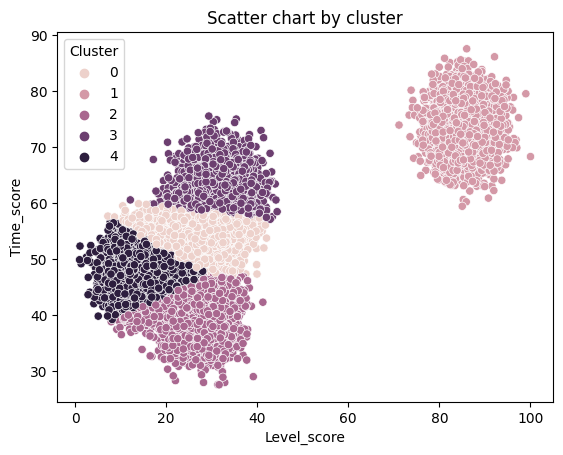

In [18]:
# 각 군집별 Level_score와 Time_score를 산포도로 시각화
ax = sns.scatterplot(data=customer_data, x='Level_score', y='Time_score', hue = 'Cluster')
plt.title('Scatter chart by cluster')
plt.show()

In [20]:
# 시각화를 위해 temp_var의 결과값을 전처리합니다. 
#emp_var의 인덱스를 리스트로 만들고 인덱스를 재배열한 후, 인덱스의 이름을 Cluster로 변경
temp_var.index = temp_var.index.tolist()
temp_var = temp_var.reset_index()
temp_var = temp_var.rename(columns = {'index' : 'Cluster'})
temp_var

,Cluster,Time_score,Level_score,Payment
0,0,54.320993,27.704579,932.056194
1,1,73.598689,85.686837,1019.265063
2,2,40.192231,27.366363,989.994592
3,3,62.588222,31.346283,1019.686163
4,4,47.773579,14.580382,861.025224


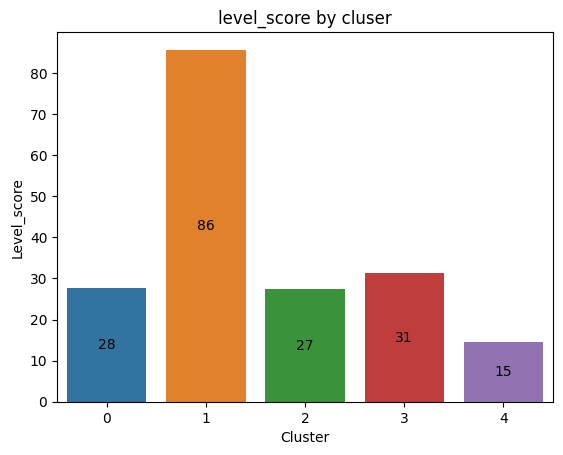

In [27]:
# 각 Cluster별 평균 Level_score를 시각화합니다. 
ax = sns.barplot(data=temp_var, x='Cluster', y='Level_score')
containers = ax.containers[0]
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center')
plt.title('level_score by cluser')
plt.show()

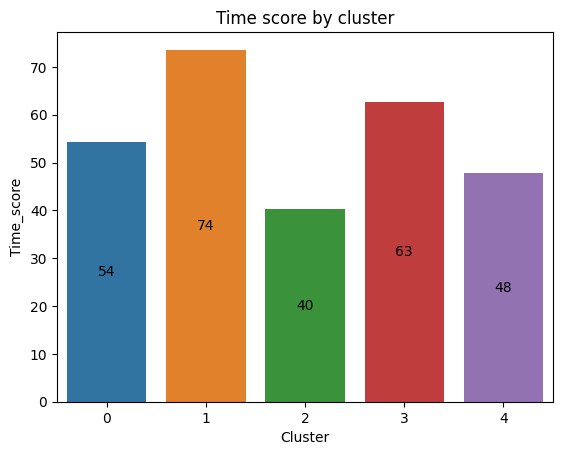

In [31]:
ax = sns.barplot(data=temp_var, x = 'Cluster', y= 'Time_score')
containers = ax.containers[0]
ax.bar_label(containers, labels = [f'{x:,.0f}' for x in containers.datavalues], label_type = 'center')
plt.title('Time score by cluster')
plt.show()

In [32]:
# customer_data의 Time_score, PK, BOSS, Gacha, Attack, Mining의 열값을 골라내고 상관관계분석하기
corr_data = customer_data[['Time_score', 'PK','BOSS','Gacha','Attack','Mining']].corr().round(2)
corr_data

,Time_score,PK,BOSS,Gacha,Attack,Mining
Time_score,1.00,0.32,0.06,-0.08,0.08,0.63
PK,0.32,1.00,0.65,0.05,-0.14,0.24
BOSS,0.06,0.65,1.00,-0.17,0.02,-0.08
Gacha,-0.08,0.05,-0.17,1.00,-0.69,-0.05
Attack,0.08,-0.14,0.02,-0.69,1.00,0.06
Mining,0.63,0.24,-0.08,-0.05,0.06,1.00


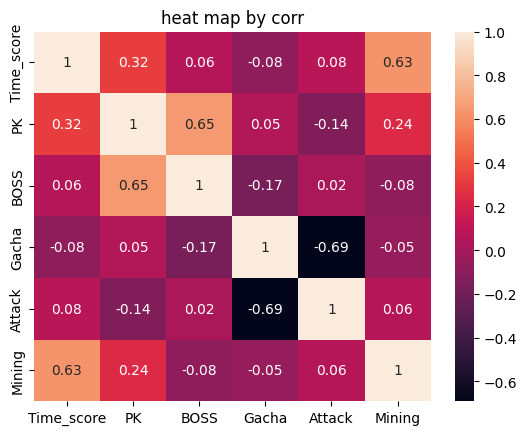

In [34]:
# 상관관계분석 결과 시각화하기 pk . mining
sns.heatmap(data = corr_data, annot=True)
plt.title('heat map by corr')
plt.show()

In [35]:
#Radar Chart를 그리기 위해 customer_data의 Cluster를 기준으로 PK, BOSS, Gacha, Atteck, Mining의 평균값을 계산하
temp_var = customer_data.groupby('Cluster').agg({'PK': 'mean', 'BOSS':'mean', 'Gacha':'mean', 'Attack':'mean', 'Mining':'mean'}).round(1)
temp_var

,PK,BOSS,Gacha,Attack,Mining
Cluster,,,,,
0,36.5,56.9,53.9,40.7,44.3
1,54.7,59.1,49.0,45.4,70.9
2,36.1,56.8,53.8,40.6,44.3
3,36.6,56.8,54.5,40.2,44.1
4,36.6,56.8,54.0,40.6,44.4


In [37]:
# 집계결과 시각화를 위한 전처리
temp_var.index =temp_var.index.tolist()
temp_var = temp_var.reset_index(drop=True)
temp_var

,PK,BOSS,Gacha,Attack,Mining
0,36.5,56.9,53.9,40.7,44.3
1,54.7,59.1,49.0,45.4,70.9
2,36.1,56.8,53.8,40.6,44.3
3,36.6,56.8,54.5,40.2,44.1
4,36.6,56.8,54.0,40.6,44.4


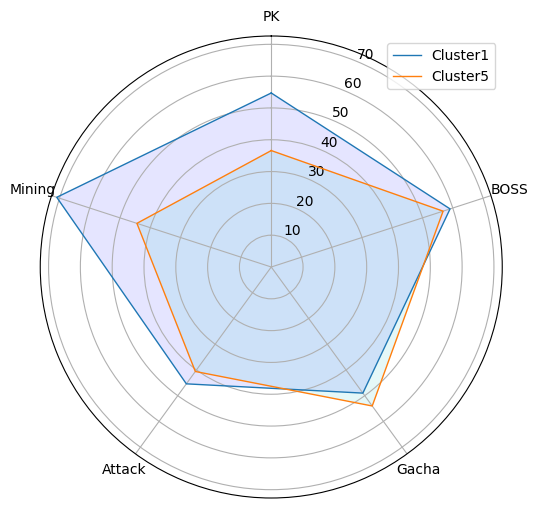

In [39]:
# Radar Chart를 이용한 집계결과 시각화
from math import pi

# Radar Chart의 각 방향 개수 정의
categories=list(temp_var)
N = len(categories)

# 방향변수 개수에 따른 레이더 차트 각(angle) 정의
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# 초기 레이더 차트 생성
plt.figure(figsize=(6,6)) #차트 크기
ax = plt.subplot(111, polar=True) #sub차트 생성

# 12시 방향을 기준으로 차트 생성
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# 레이더차트에 Cluster1 표기
values = temp_var.loc[1].tolist()
values.append(values[0])
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster1')
ax.fill(angles, values, 'b', alpha=0.1)

# 레이더차트에 Cluster5 표기
values = temp_var.loc[4].tolist()
values.append(values[0])
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Cluster5')
ax.fill(angles, values, 'c', alpha=0.1)

# 각 변수이름 부여
plt.xticks(angles[:-1], categories)
plt.legend()
plt.show()